# 2022 NZMSA Data Science Submission.

In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [36]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

%matplotlib inline

# Exploratory Data Analysis

In [37]:
# Read and display dataset
ds = pd.read_csv("weather-data.csv")
ds.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [38]:
ds.columns

Index([' station', 'valid', 'tmpc', 'dwpc', 'relh', 'sknt', 'gust',
       'peak_wind_drct'],
      dtype='object')

In [54]:
# Rename columns to more readable names
ds.columns = ["Station", "Date and Time", "Temp of Env (°C)", "Temp of dew point (°C)", 
"Relative Humidity of Env (%)", "Wind Speed (knots)", "Wind Gust (knots)", "Peak Wind Direction"]
ds.head()

# Get general statistics of the dataset
ds.describe()

,Temp of Env (°C),Temp of dew point (°C),Relative Humidity of Env (%),Wind Speed (knots),Wind Gust (knots),Peak Wind Direction
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [59]:
# Check for null values and examine data types
ds.info()

ds.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Station                       103713 non-null  object        
 1   Date and Time                 103713 non-null  datetime64[ns]
 2   Temp of Env (°C)              103678 non-null  float64       
 3   Temp of dew point (°C)        103678 non-null  float64       
 4   Relative Humidity of Env (%)  103593 non-null  float64       
 5   Wind Speed (knots)            103704 non-null  float64       
 6   Wind Gust (knots)             1203 non-null    float64       
 7   Peak Wind Direction           0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


Station                                 object
Date and Time                   datetime64[ns]
Temp of Env (°C)                       float64
Temp of dew point (°C)                 float64
Relative Humidity of Env (%)           float64
Wind Speed (knots)                     float64
Wind Gust (knots)                      float64
Peak Wind Direction                    float64
dtype: object

In [57]:
# Convert 'Date and Time' column to datetime type
ds['Date and Time'] = pd.to_datetime(ds['Date and Time'])
ds.dtypes

Station                                 object
Date and Time                   datetime64[ns]
Temp of Env (°C)                       float64
Temp of dew point (°C)                 float64
Relative Humidity of Env (%)           float64
Wind Speed (knots)                     float64
Wind Gust (knots)                      float64
Peak Wind Direction                    float64
dtype: object

In [60]:
# we can see that the last column in the dataset ('Peak Wind Direction') contains 0 values
# therefore we will exclude this column going forward
ds = ds.drop(['Peak Wind Direction'], axis=1)

<AxesSubplot:>

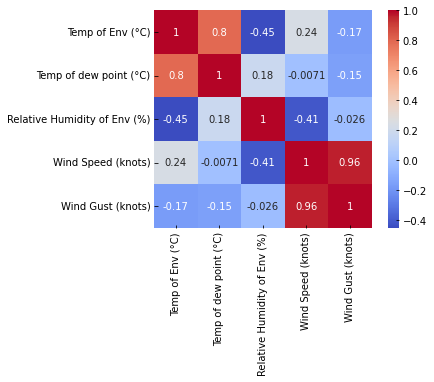

In [61]:
# Correlation plot of dataset
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(ds.corr(), cmap='coolwarm', annot=True, square=True)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Ownert\AppData\Local\Temp\ipykernel_4940\2343204137.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



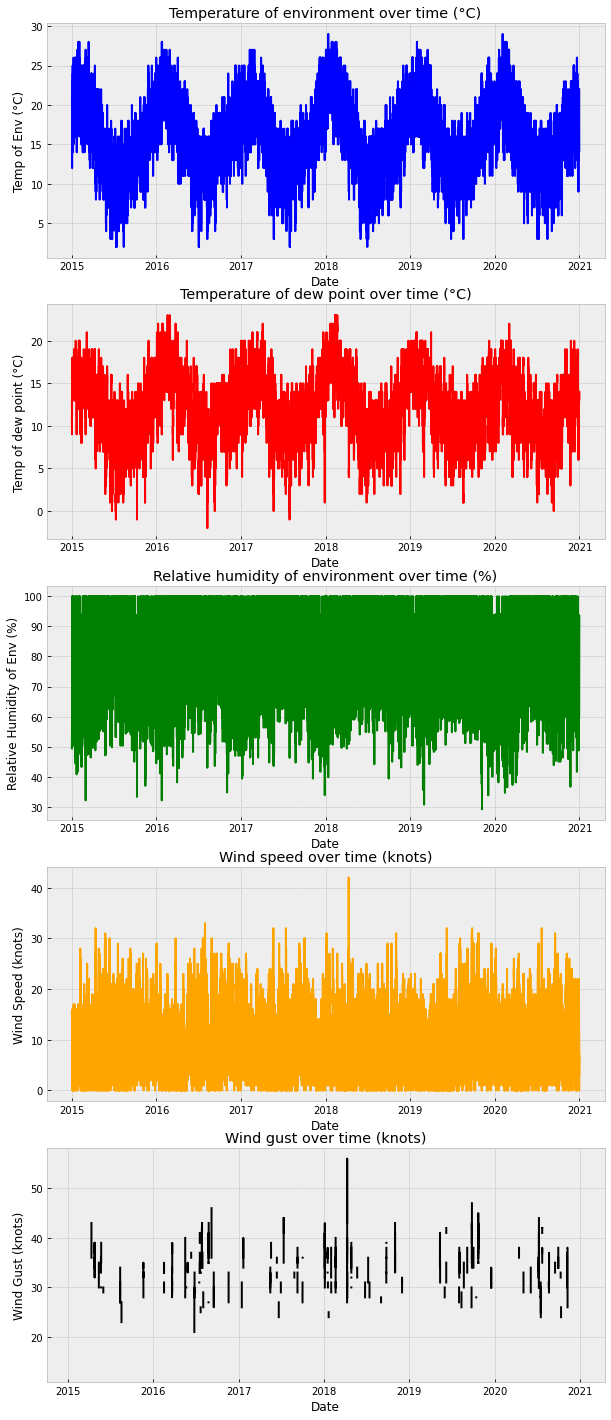

In [46]:
# multigraph to visualise change of numerical sections over time as part of EDA

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(ds["Date and Time"], ds["Temp of Env (°C)"], color="blue")
ax1.set_title("Temperature of environment over time (°C)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temp of Env (°C)")

ax2.plot(ds["Date and Time"], ds["Temp of dew point (°C)"], color="red")
ax2.set_title("Temperature of dew point over time (°C)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temp of dew point (°C)")

ax3.plot(ds["Date and Time"], ds["Relative Humidity of Env (%)"], color="green")
ax3.set_title("Relative humidity of environment over time (%)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Relative Humidity of Env (%)")

ax4.plot(ds["Date and Time"], ds["Wind Speed (knots)"], color="orange")
ax4.set_title("Wind speed over time (knots)")
ax4.set_xlabel("Date")
ax4.set_ylabel("Wind Speed (knots)")

ax5.plot(ds["Date and Time"], ds["Wind Gust (knots)"], color="black")
ax5.set_title("Wind gust over time (knots)")
ax5.set_xlabel("Date")
ax5.set_ylabel("Wind Gust (knots)")

fig.set_size_inches(10,25)
fig.show()

#### Comments on correlation plot:
The correlation plot shows a ver high correlation between 'Wind Speed' and 'Wind Gust'. There is also a high correlation between 'Temperature of the environment' and 'Temperature of the dew point'. However, it is important to note that causation does not equal causation. 

There is no significant correlation amongst the other categories.

#### Comments on multigraph:
We can see that all graphs depict a seasonal pattern which remains somewhat consistent each year.
The graph for 'Wind Gust over time' has also revealed gaps in the dataset which may need to be reassessed.

### Model Objective
After looking at the data visualisations from during the EDA phase, I will be creating a model to predict the "Temperature of the Environment"

This is in part due to the consistent seasonal pattern illustrated in the dataset which would result in a more reliable model than 'Wind Gust' or 'Wind Speed' which have shown to have some clear outliers.

# Data Preparation

I will utilise the Neural Prophet package to model and forecast the Temperature of Env as it is a reliable and efficient way to break down the datasets into components to visualise with ease.

In [64]:
# neural prophet expects only 2 columns of data passed in - 'ds' and 'y':
# 'ds' - represents the dates
# 'y' - represents the value we are trying to predict (the Temperature of Env)

# hence we create a new dataset using only those columns and renaming them as required
npdataset = ds[["Date and Time", "Temp of Env (°C)"]]
npdataset.dropna(inplace=True)
npdataset.columns = ['ds', 'y']

npdataset

WARNING - (py.warnings._showwarnmsg) - C:\Users\Ownert\AppData\Local\Temp\ipykernel_4940\2074012842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npdataset.dropna(inplace=True)



,ds,y
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0
...,...,...
103708,2020-12-30 21:30:00,19.0
103709,2020-12-30 22:00:00,19.0
103710,2020-12-30 22:30:00,20.0
103711,2020-12-30 23:00:00,20.0


# Data Modelling 

In [65]:
# create and train the neural prophet model
m = NeuralProphet()
model = m.fit(npdataset)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 57


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.88E-02, min: 1.96E+00


  0%|          | 0/175 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.88E-02, min: 1.96E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.88E-02
Epoch[57/57]: 100%|██████████| 57/57 [02:24<00:00,  2.54s/it, SmoothL1Loss=0.00489, MAE=1.62, RMSE=2.07, RegLoss=0]


In [80]:
# forcast future temperature for 750 after the dataset
future = m.make_future_dataframe(npdataset, periods=750)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
WARNING - (py.warnings._showwarnmsg) - c:\Users\Ownert\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2020-12-31 00:00:00,None,21.822813,NaN,16.081364,3.410192,-0.056317,2.387575
1,2020-12-31 00:30:00,None,22.001629,NaN,16.081390,3.411309,-0.053696,2.562626
2,2020-12-31 01:00:00,None,22.132971,NaN,16.081413,3.412428,-0.051158,2.690287
3,2020-12-31 01:30:00,None,22.218437,NaN,16.081436,3.413546,-0.048709,2.772164
4,2020-12-31 02:00:00,None,22.257118,NaN,16.081461,3.414666,-0.046355,2.807346


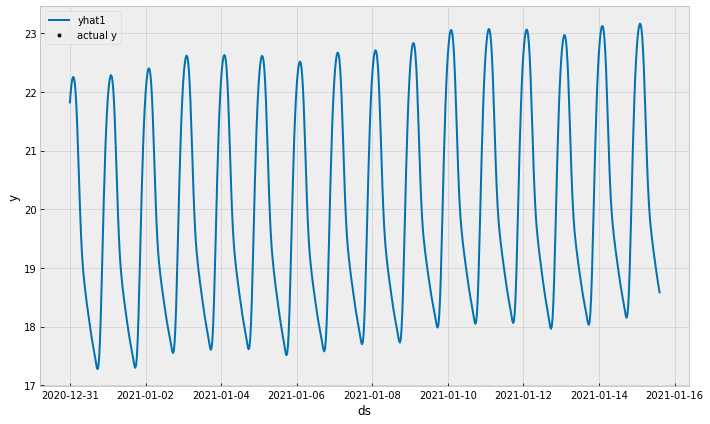

In [83]:
# plot the forcast for 750 days after the dataset
plot1 = m.plot(forecast)

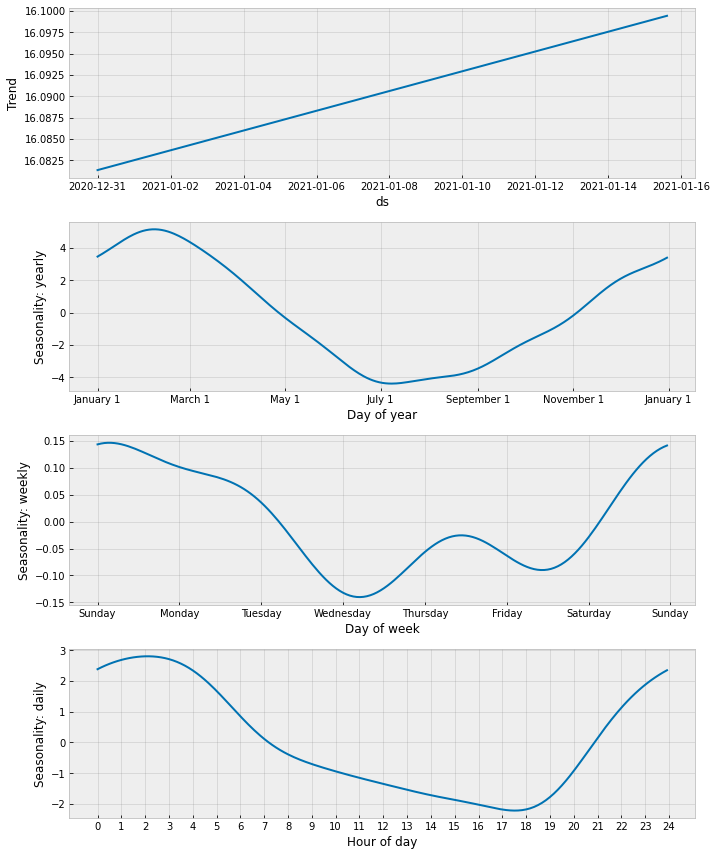

In [85]:
# plot the different components identified by neural prophet
plot2 = m.plot_components(forecast)

# Conclusion

* The data model predicts that there will be a general increase in the Temperature of the Environment at the observed station in the upcoming years. 
* Neural Prophet did an amazing job breaking down and visualising the conponents of the forecast by serparting the observable pattern of the daily, weekly, and yearly seasonality.
* It was also surprising to see the general trend at such a steep increase as this was not as evident in the multigraph.

* I found it interesting that there wasn't a stronger correlation between different categories of the dataset. 
* It was fascinating to see the change in Temperature of the Environment being impacted by the difference seasonalities shown.